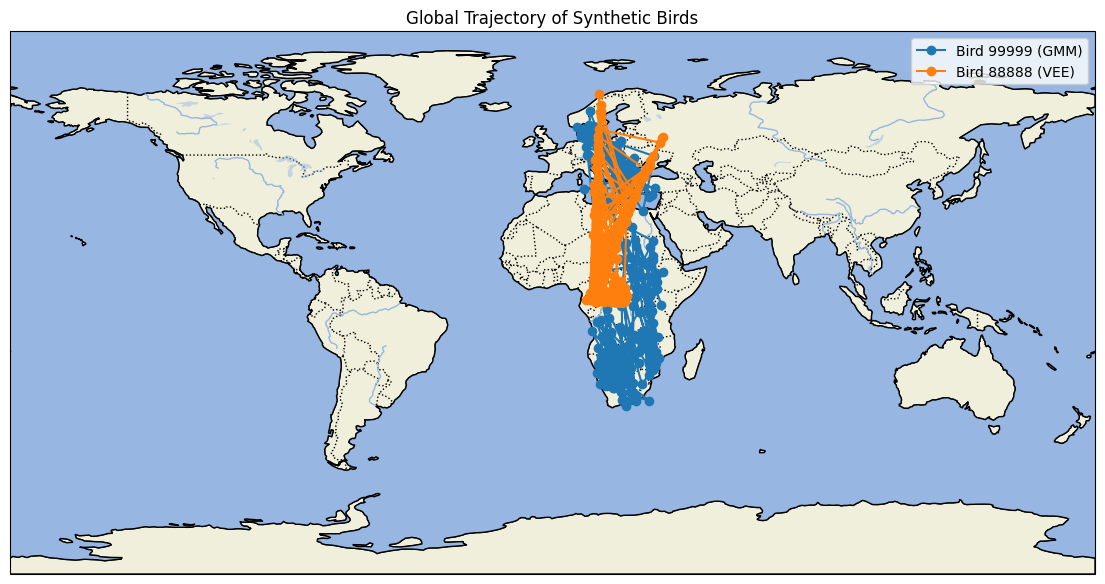

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the new dataset
synthetic_file_path = "Data/SyntheticData_Generative_MultiModel.csv"
df = pd.read_csv(synthetic_file_path)

# Filter data for the two birds
bird_99999 = df[df["bird_id"] == 99999]
bird_88888 = df[df["bird_id"] == 88888]

# Create global map projection
fig, ax = plt.subplots(figsize=(14, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Plot trajectories
ax.plot(bird_99999["longitude"], bird_99999["latitude"], marker='o', linestyle='-', label="Bird 99999 (GMM)", transform=ccrs.PlateCarree())
ax.plot(bird_88888["longitude"], bird_88888["latitude"], marker='o', linestyle='-', label="Bird 88888 (VEE)", transform=ccrs.PlateCarree())

# Improve visualization
title = plt.gca()
title.set_title("Global Trajectory of Synthetic Birds")
ax.legend()

# Show the plot
plt.show()


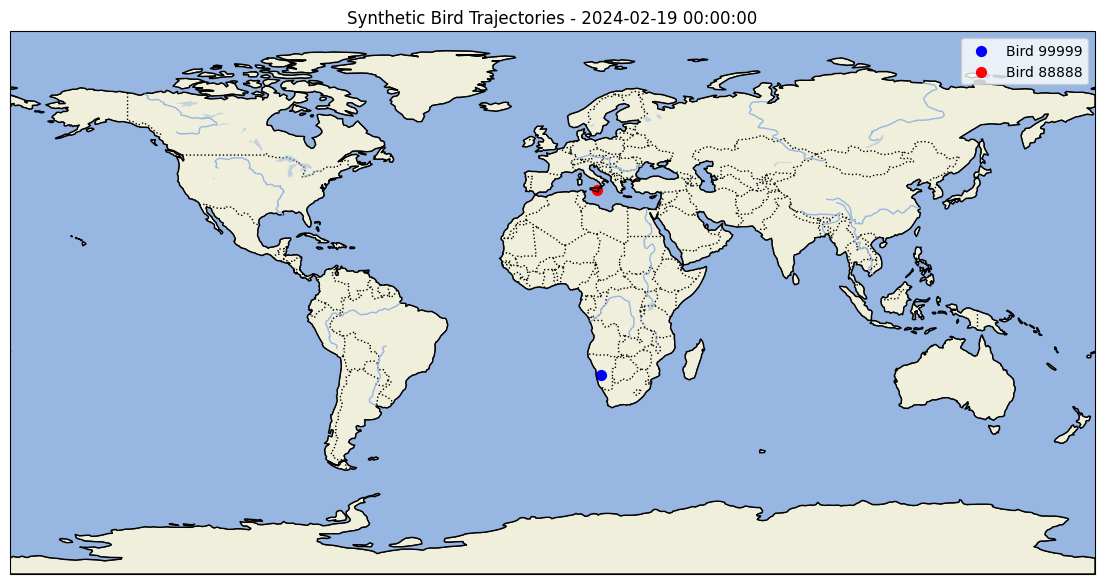

KeyboardInterrupt: 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import time
from IPython.display import display, clear_output

# Load the new dataset
synthetic_file_path = "Data/SyntheticData_Generative_MultiModel.csv"
df = pd.read_csv(synthetic_file_path)

# Convert timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Get the unique list of timestamps
timestamps = df["timestamp"].unique()

# Create animation of static maps updating bird points dynamically
for timestamp in timestamps:
    clear_output(wait=True)
    subset = df[df["timestamp"] == timestamp]
    
    fig, ax = plt.subplots(figsize=(14, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_global()
    
    # Add map elements
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    
    # Plot bird points
    for _, row in subset.iterrows():
        color = 'blue' if row["bird_id"] == 99999 else 'red'
        ax.scatter(row["longitude"], row["latitude"], color=color, s=50, label=f"Bird {row['bird_id']}", transform=ccrs.PlateCarree())
    
    # Display current timestamp in the title
    ax.set_title(f"Synthetic Bird Trajectories - {timestamp}")
    
    # Show map
    plt.legend()
    plt.show()
    
    time.sleep(1)


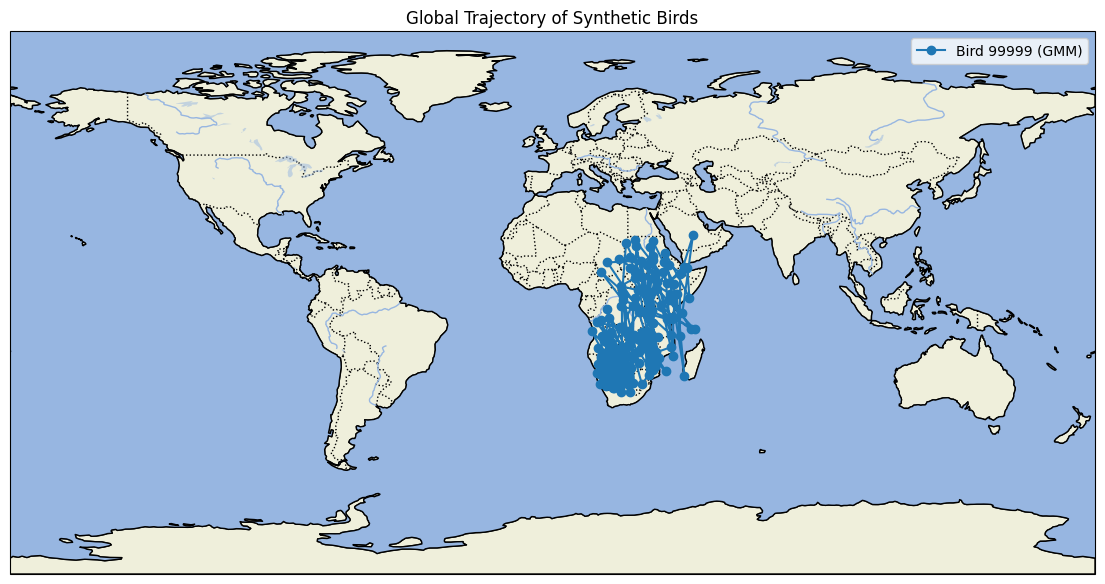

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the new dataset
synthetic_file_path = "Data/SyntheticData_Ensemble.csv"
df = pd.read_csv(synthetic_file_path)

# Filter data for the two birds
bird_99999 = df[df["bird_id"] == 99999]
# Create global map projection
fig, ax = plt.subplots(figsize=(14, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Plot trajectories
ax.plot(bird_99999["longitude"], bird_99999["latitude"], marker='o', linestyle='-', label="Bird 99999 (GMM)", transform=ccrs.PlateCarree())

# Improve visualization
title = plt.gca()
title.set_title("Global Trajectory of Synthetic Birds")
ax.legend()

# Show the plot
plt.show()
